# Problem Statment

In [1]:
'''
Problem Statement
The goal is to predict the price of real estate properties based on their attributes such as size, number of bedrooms, bathrooms, floors, amenities, and location.

This project aims to create a Machine Learning model that can accurately estimate property prices. The predictions will be used to assist:

Real Estate Agencies: For setting competitive and fair pricing.
Buyers: To understand the price range for properties matching their preferences.
Sellers: To optimize their listing price for faster sales.
Additionally, this project will include the development of a user-friendly web application where users can input property details and receive an estimated price in real time.

'''

'\nProblem Statement\nThe goal is to predict the price of real estate properties based on their attributes such as size, number of bedrooms, bathrooms, floors, amenities, and location.\n\nThis project aims to create a Machine Learning model that can accurately estimate property prices. The predictions will be used to assist:\n\nReal Estate Agencies: For setting competitive and fair pricing.\nBuyers: To understand the price range for properties matching their preferences.\nSellers: To optimize their listing price for faster sales.\nAdditionally, this project will include the development of a user-friendly web application where users can input property details and receive an estimated price in real time.\n\n'

In [2]:

# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
# Replace 'dataset_path' with the actual path to your dataset file
dataset_path = r'C:\\Users\\ma578\\OneDrive\\Documents\\Motive\\DataSets\\IPHONE\\Housing.csv'
df = pd.read_csv(dataset_path)

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
# Get dataset dimensions
print("\nDataset Dimensions:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Dataset Dimensions:
Rows: 545, Columns: 13


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
# Understand the data types of each column
print("\nData Types:")
print(df.dtypes)



Data Types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [7]:
# Summary statistics of numerical columns
print("\nSummary Statistics (Numerical Features):")
print(df.describe())


Summary Statistics (Numerical Features):
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


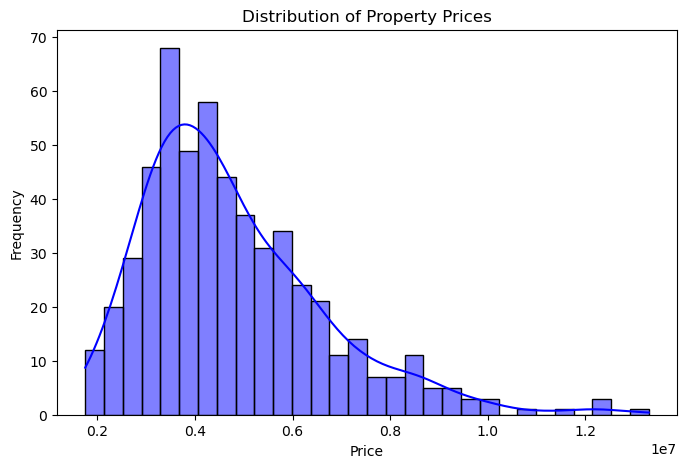

In [8]:
# Check the distribution of the target variable (price)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Check categorical features for unique values
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Features and Their Unique Values:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")



Categorical Features and Their Unique Values:
mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [10]:
# Check for class balance in categorical variables (e.g., furnishingstatus)
for col in categorical_columns:
    print(f"\nClass Distribution in {col}:")
    print(df[col].value_counts(normalize=True) * 100)


Class Distribution in mainroad:
yes    85.87156
no     14.12844
Name: mainroad, dtype: float64

Class Distribution in guestroom:
no     82.201835
yes    17.798165
Name: guestroom, dtype: float64

Class Distribution in basement:
no     64.954128
yes    35.045872
Name: basement, dtype: float64

Class Distribution in hotwaterheating:
no     95.412844
yes     4.587156
Name: hotwaterheating, dtype: float64

Class Distribution in airconditioning:
no     68.440367
yes    31.559633
Name: airconditioning, dtype: float64

Class Distribution in prefarea:
no     76.513761
yes    23.486239
Name: prefarea, dtype: float64

Class Distribution in furnishingstatus:
semi-furnished    41.651376
unfurnished       32.660550
furnished         25.688073
Name: furnishingstatus, dtype: float64


In [11]:
# Check for missing values
print("Missing Values Before Handling:")
print(df.isnull().sum())

# Handle missing values
# Numeric columns: Fill with the median
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Categorical columns: Fill with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing Values After Handling:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [12]:
# Check for duplicates
print("\nNumber of duplicate rows before removing:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Verify duplicates removed
print("Number of duplicate rows after removing:", df.duplicated().sum())



Number of duplicate rows before removing: 0
Number of duplicate rows after removing: 0


In [13]:
# Correct inconsistent data in categorical columns
for col in categorical_columns:
    if df[col].dtype == 'object':
        # Convert to lowercase and strip spaces
        df[col] = df[col].str.lower().str.strip()

# Verify correction
print("\nUnique values after correction:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")



Unique values after correction:
mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [14]:
# Handle outliers using the IQR method
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Verify data after handling outliers
print("\nDataset shape after removing outliers:", df.shape)



Dataset shape after removing outliers: (365, 13)


In [15]:
# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset:")
print(df.head())

# Save the cleaned dataset for further steps
df.to_csv(r'C:\Users\ma578\OneDrive\Documents\Motive\DataSets\IPHONE\project 2\cleaned_dataset.csv', index=False)



Cleaned Dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
20  8750000  4320         3          1        2      yes        no      yes   
22  8645000  8050         3          1        1      yes       yes      yes   
27  8400000  8875         3          1        1      yes        no       no   
40  7875000  6550         3          1        2      yes        no      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
20             yes              no        2       no   semi-furnished  
22              no             yes        1       no        furnished  
27              no              no        1       no   semi-furnished  
40              no             yes        0      yes        furnished  


In [16]:
import pandas as pd

# Load the cleaned dataset
file_path = r'C:\Users\ma578\OneDrive\Documents\Motive\DataSets\IPHONE\project 2\cleaned_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print("Loaded cleaned dataset:")
print(df.head())


Loaded cleaned dataset:


     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  9100000  6000         4          1        2      yes        no      yes   
1  8750000  4320         3          1        2      yes        no      yes   
2  8645000  8050         3          1        1      yes       yes      yes   
3  8400000  8875         3          1        1      yes        no       no   
4  7875000  6550         3          1        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no              no        2       no   semi-furnished  
1             yes              no        2       no   semi-furnished  
2              no             yes        1       no        furnished  
3              no              no        1       no   semi-furnished  
4              no             yes        0      yes        furnished  


In [17]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder for binary categorical features
binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
label_encoders = {}

for col in binary_features:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Apply OneHotEncoder for multi-class categorical features
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Verify encoding
print("\nDataset after encoding categorical variables:")
print(df.head())



Dataset after encoding categorical variables:
     price  area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  9100000  6000         4          1        2         1          0         1   
1  8750000  4320         3          1        2         1          0         1   
2  8645000  8050         3          1        1         1          1         1   
3  8400000  8875         3          1        1         1          0         0   
4  7875000  6550         3          1        2         1          0         1   

   hotwaterheating  airconditioning  parking  prefarea  \
0                0                0        2         0   
1                1                0        2         0   
2                0                1        1         0   
3                0                0        1         0   
4                0                1        0         1   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                1                

In [18]:
# Create new feature: area_per_story
df['area_per_story'] = df['area'] / df['stories']

# Verify the new feature
print("\nNew Feature 'area_per_story':")
print(df[['area', 'stories', 'area_per_story']].head())



New Feature 'area_per_story':
   area  stories  area_per_story
0  6000        2          3000.0
1  4320        2          2160.0
2  8050        1          8050.0
3  8875        1          8875.0
4  6550        2          3275.0


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
scaler = MinMaxScaler()
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'area_per_story']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Verify normalization
print("\nDataset after normalization:")
print(df[numeric_features].head())



Dataset after normalization:
       area  bedrooms  bathrooms  stories  parking  area_per_story
0  0.499426  1.000000        0.0      0.5      1.0        0.236910
1  0.306544  0.666667        0.0      0.5      1.0        0.149819
2  0.734788  0.666667        0.0      0.0      0.5        0.760498
3  0.829506  0.666667        0.0      0.0      0.5        0.846034
4  0.562572  0.666667        0.0      0.5      0.0        0.265422


In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Verify standardization
print("\nDataset after standardization:")
print(df[numeric_features].head())



Dataset after standardization:
       area  bedrooms  bathrooms   stories   parking  area_per_story
0  0.799475  2.017626        0.0  0.725729  1.925353       -0.259771
1 -0.176494  0.413196        0.0  0.725729  1.925353       -0.666122
2  1.990389  0.413196        0.0 -0.899369  0.609335        2.183174
3  2.469660  0.413196        0.0 -0.899369  0.609335        2.582269
4  1.118988  0.413196        0.0  0.725729 -0.706684       -0.126739


In [22]:
# Save the feature-engineered dataset
output_path = r'C:\\Users\\ma578\\OneDrive\\Documents\\Motive\\DataSets\\IPHONE\\project 2\\feature_engineered_dataset.csv'
df.to_csv(output_path, index=False)

print("\nFeature-engineered dataset saved successfully!")


PermissionError: [Errno 13] Permission denied: 'C:\\\\Users\\\\ma578\\\\OneDrive\\\\Documents\\\\Motive\\\\DataSets\\\\IPHONE\\\\project 2\\\\feature_engineered_dataset.csv'

In [23]:
import pandas as pd

# Load the feature-engineered dataset
file_path = r'C:\Users\ma578\OneDrive\Documents\Motive\DataSets\IPHONE\project 2\feature_engineered_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print("Loaded feature-engineered dataset:")
print(df.head())


Loaded feature-engineered dataset:
     price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  9100000  0.799475  2.017626        0.0  0.725729         1          0   
1  8750000 -0.176494  0.413196        0.0  0.725729         1          0   
2  8645000  1.990389  0.413196        0.0 -0.899369         1          1   
3  8400000  2.469660  0.413196        0.0 -0.899369         1          0   
4  7875000  1.118988  0.413196        0.0  0.725729         1          0   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         1                0                0  1.925353         0   
1         1                1                0  1.925353         0   
2         1                0                1  0.609335         0   
3         0                0                0  0.609335         0   
4         1                0                1 -0.706684         1   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
0                        

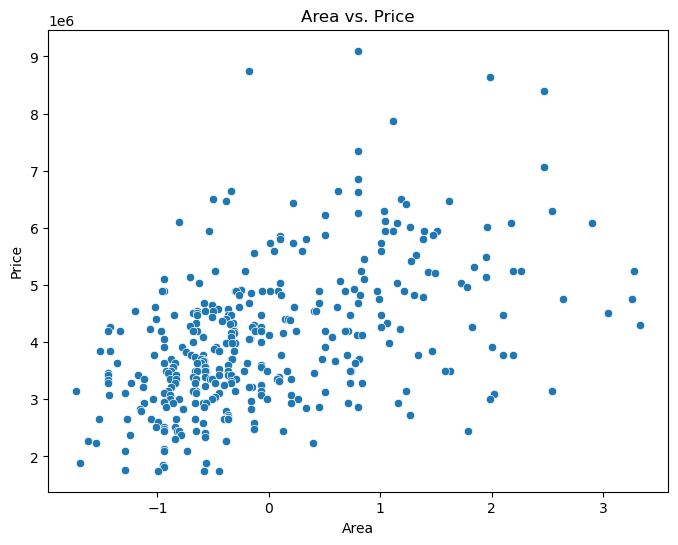

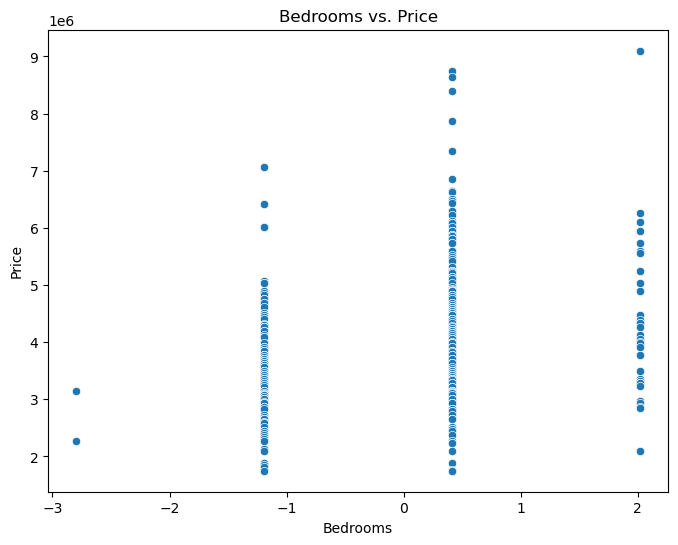

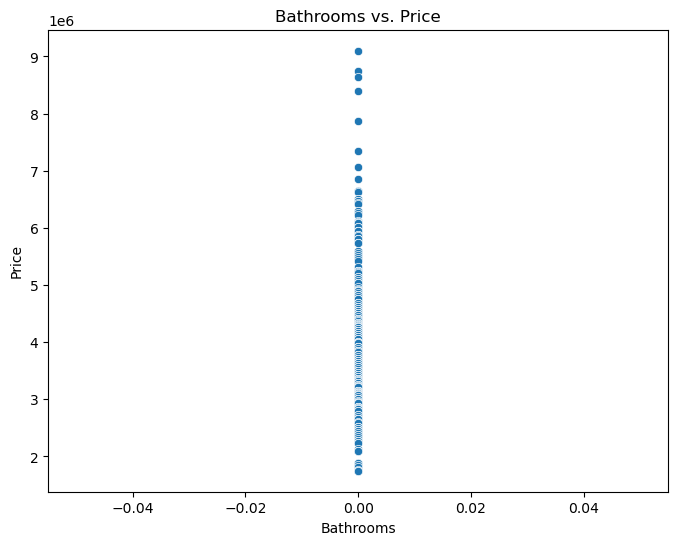

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for area vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Scatter plot for bedrooms vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Bedrooms vs. Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

# Scatter plot for bathrooms vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bathrooms', y='price', data=df)
plt.title('Bathrooms vs. Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()


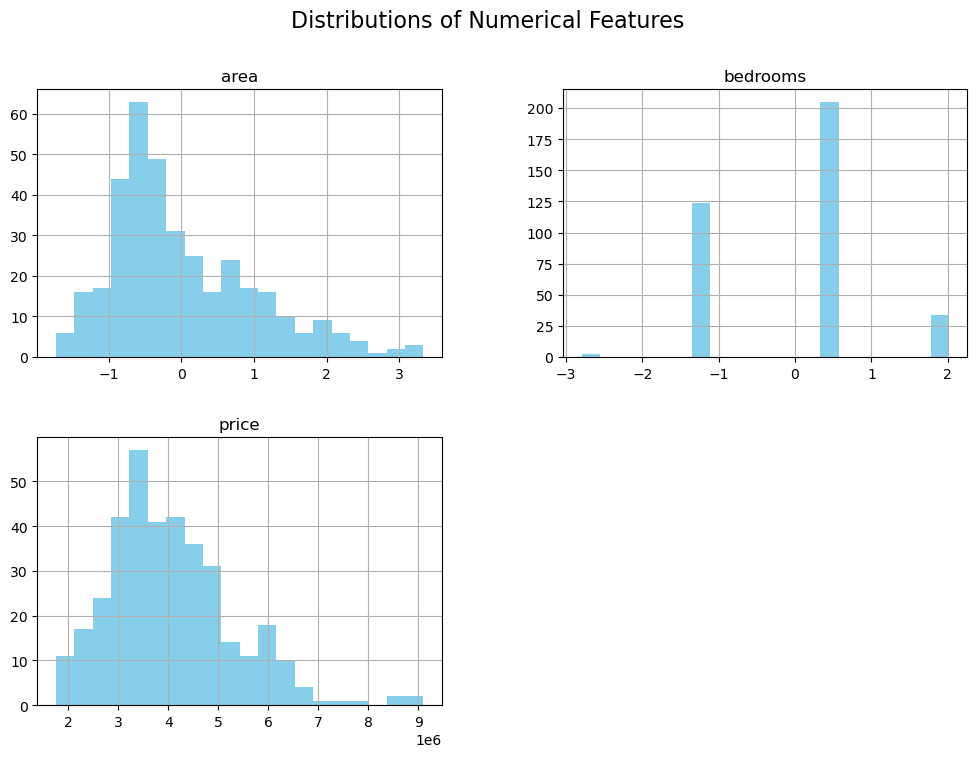

In [25]:
# Histogram for numerical features
df[['area', 'bedrooms', 'price']].hist(figsize=(12, 8), bins=20, color='skyblue')
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()


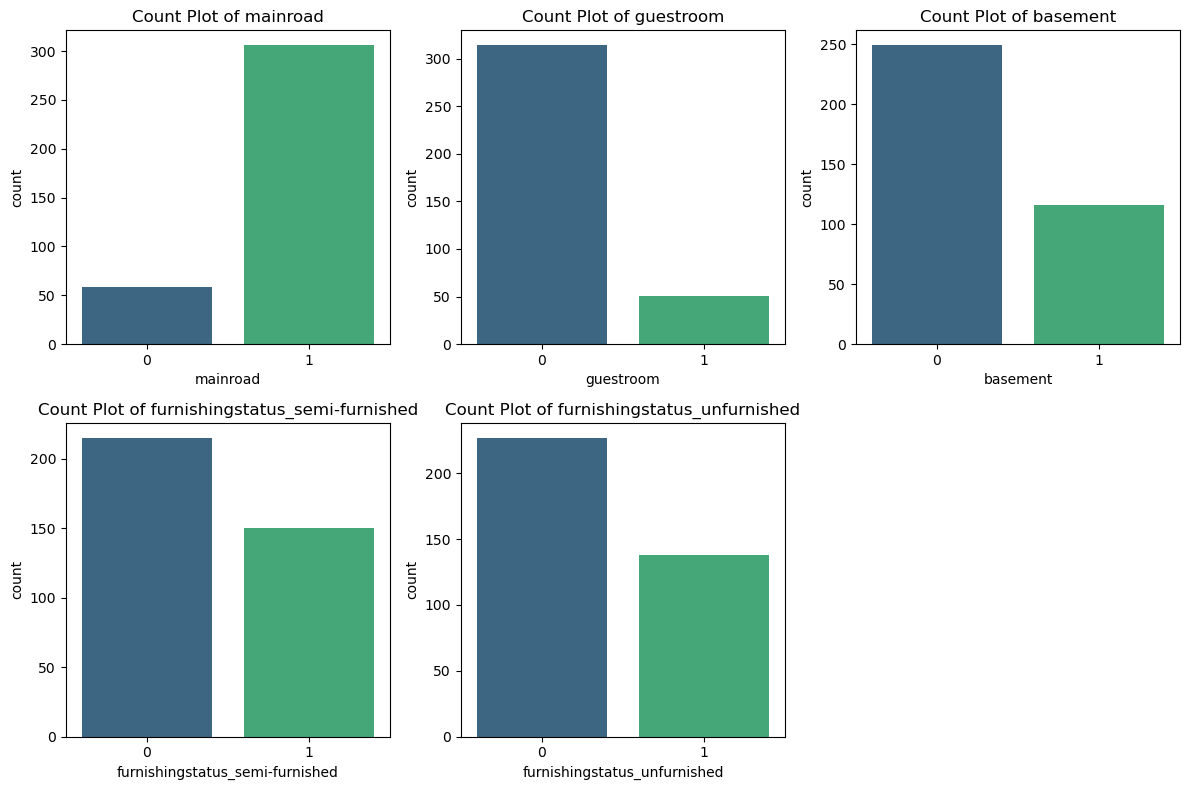

In [26]:
# Bar plots for categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()


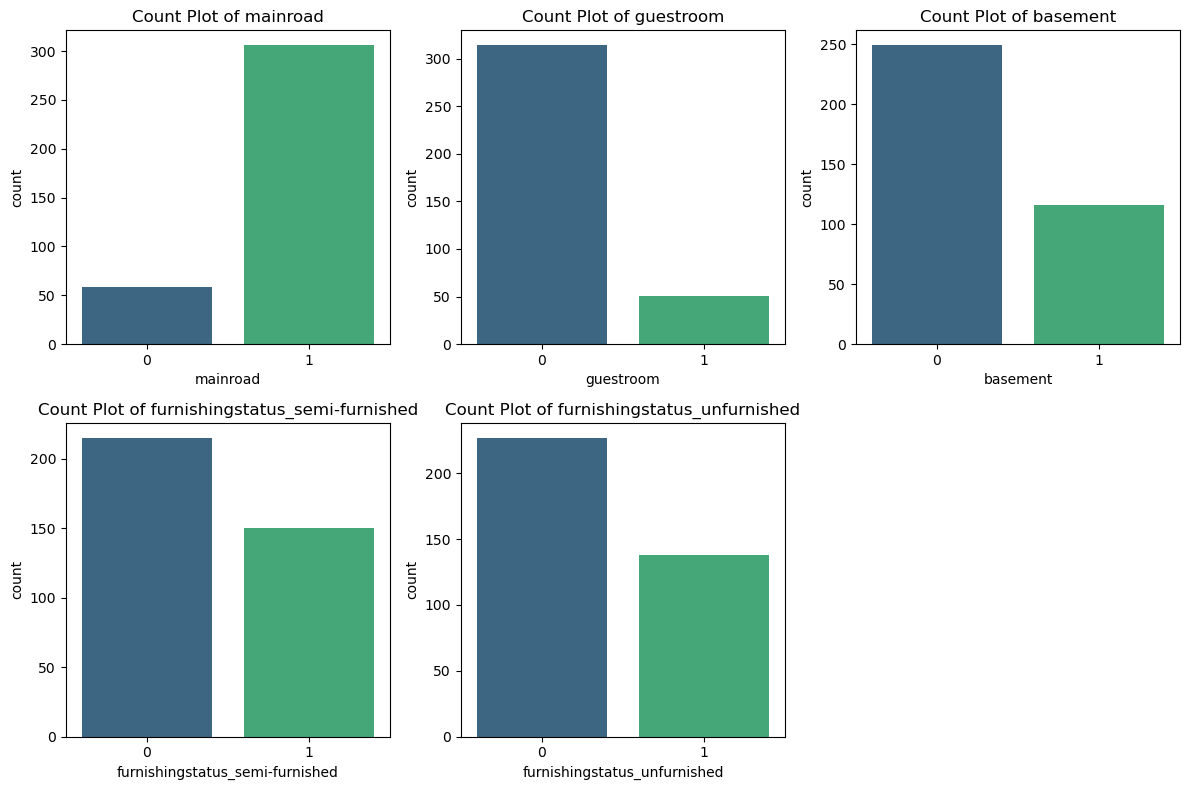

In [27]:
# Bar plots for categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()


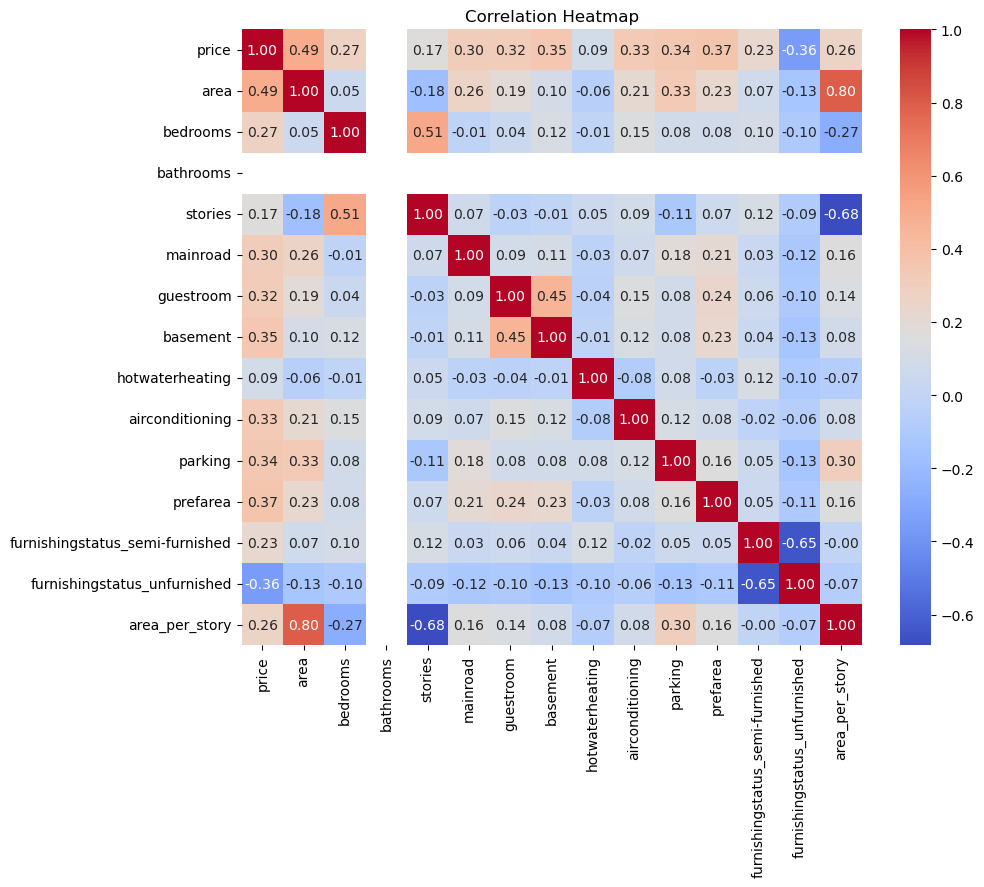

In [28]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [29]:
# Correlation with price
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print("\nFeatures most correlated with price:")
print(correlation_with_price)



Features most correlated with price:
price                              1.000000
area                               0.494096
prefarea                           0.366295
basement                           0.354127
parking                            0.342046
airconditioning                    0.329226
guestroom                          0.317254
mainroad                           0.304420
bedrooms                           0.271667
area_per_story                     0.262739
furnishingstatus_semi-furnished    0.226140
stories                            0.169148
hotwaterheating                    0.091479
furnishingstatus_unfurnished      -0.356101
bathrooms                               NaN
Name: price, dtype: float64


In [30]:
from sklearn.model_selection import train_test_split

# Define the target variable (price) and features
X = df.drop(columns=['price'])  # Features (independent variables)
y = df['price']                 # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shapes of the resulting datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (292, 14)
Testing Features Shape: (73, 14)
Training Target Shape: (292,)
Testing Target Shape: (73,)


In [31]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb


In [32]:
# Define features and target variable
X = df.drop('price', axis=1)
y = df['price']


In [33]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Initialize models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)
lgb_model = lgb.LGBMRegressor(random_state=42)


In [36]:
# Train the models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 12
[LightGBM] [Info] Start training from score 4013985.787671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMRegressor(random_state=42)

In [37]:
# Predict on test data
lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
lgb_preds = lgb_model.predict(X_test)


In [38]:
# Evaluate models
def evaluate_model(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2


In [39]:
# Linear Regression Evaluation
lr_results = evaluate_model(y_test, lr_preds)
print("Linear Regression Evaluation:")
print(f"MAE: {lr_results[0]}, MSE: {lr_results[1]}, RMSE: {lr_results[2]}, R²: {lr_results[3]}")


Linear Regression Evaluation:
MAE: 711337.8737134992, MSE: 1091331916784.7551, RMSE: 1044668.3286023154, R²: 0.48850385704054433


In [40]:
# Decision Tree Evaluation
dt_results = evaluate_model(y_test, dt_preds)
print("Decision Tree Evaluation:")
print(f"MAE: {dt_results[0]}, MSE: {dt_results[1]}, RMSE: {dt_results[2]}, R²: {dt_results[3]}")


Decision Tree Evaluation:
MAE: 805292.4657534247, MSE: 1402804724280.822, RMSE: 1184400.5759373903, R²: 0.34251972772050576


In [41]:
# Random Forest Evaluation
rf_results = evaluate_model(y_test, rf_preds)
print("Random Forest Evaluation:")
print(f"MAE: {rf_results[0]}, MSE: {rf_results[1]}, RMSE: {rf_results[2]}, R²: {rf_results[3]}")


Random Forest Evaluation:
MAE: 677552.8858447488, MSE: 1080997678117.3676, RMSE: 1039710.3818455251, R²: 0.4933474093434628


In [42]:
# XGBoost Evaluation
xgb_results = evaluate_model(y_test, xgb_preds)
print("XGBoost Evaluation:")
print(f"MAE: {xgb_results[0]}, MSE: {xgb_results[1]}, RMSE: {xgb_results[2]}, R²: {xgb_results[3]}")


XGBoost Evaluation:
MAE: 764428.0873287672, MSE: 1267405218800.6714, RMSE: 1125790.930324397, R²: 0.4059800955027981


In [43]:
# LightGBM Evaluation
lgb_results = evaluate_model(y_test, lgb_preds)
print("LightGBM Evaluation:")
print(f"MAE: {lgb_results[0]}, MSE: {lgb_results[1]}, RMSE: {lgb_results[2]}, R²: {lgb_results[3]}")


LightGBM Evaluation:
MAE: 688947.9168196478, MSE: 1076359448293.6744, RMSE: 1037477.4447156306, R²: 0.49552130037376285


In [44]:
from sklearn.model_selection import RandomizedSearchCV


In [45]:
from scipy.stats import randint, uniform

# RandomizedSearchCV for Linear Regression (Ridge)
lr_param_dist = {
    'alpha': uniform(0.1, 100),  # Random distribution
}


In [46]:
# RandomizedSearchCV for Decision Tree
dt_param_dist = {
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
}


In [47]:
# RandomizedSearchCV for Random Forest
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
}


In [48]:
# RandomizedSearchCV for XGBoost
xgb_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 9),
}


In [49]:
# RandomizedSearchCV for LightGBM
lgb_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 9),
}


In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
lr_model = Ridge()

# Hyperparameter grid for Ridge
lr_param_dist = {
    'alpha': np.logspace(-6, 6, 13)  # Regularization strength
}

# RandomizedSearchCV for Linear Regression
rand_lr = RandomizedSearchCV(estimator=lr_model, param_distributions=lr_param_dist, n_iter=10, cv=5, 
                             scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)
rand_lr.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [51]:
# Print the best parameters and best score for Linear Regression
print("Best parameters for Linear Regression:", rand_lr.best_params_)
print("Best score for Linear Regression:", rand_lr.best_score_)


Best parameters for Linear Regression: {'alpha': 10.0}
Best score for Linear Regression: -699697091443.582


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
dt_model = DecisionTreeRegressor(random_state=42)

# Hyperparameter grid for Decision Tree
dt_param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# RandomizedSearchCV for Decision Tree
rand_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_param_dist, n_iter=10, cv=5, 
                             scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)
rand_dt.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A2590710>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A2061510>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A2578610>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [53]:
# Print the best parameters and best score for Decision Tree
print("Best parameters for Decision Tree:", rand_dt.best_params_)
print("Best score for Decision Tree:", rand_dt.best_score_)


Best parameters for Decision Tree: {'max_depth': 17, 'min_samples_leaf': 19, 'min_samples_split': 13}
Best score for Decision Tree: -883499630450.2852


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter grid for Random Forest
rf_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# RandomizedSearchCV for Random Forest
rand_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_dist, n_iter=10, cv=5, 
                             scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)
rand_rf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A25B8B50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A25BAF10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A25B8950>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A2615E10>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [55]:
# Print the best parameters and best score for Random Forest
print("Best parameters for Random Forest:", rand_rf.best_params_)
print("Best score for Random Forest:", rand_rf.best_score_)


Best parameters for Random Forest: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 513}
Best score for Random Forest: -740484002139.03


In [56]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the model
xgb_model = xgb.XGBRegressor(random_state=42)

# Hyperparameter grid for XGBoost
xgb_param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 20),
    'subsample': uniform(0.5, 1.0),
}

# RandomizedSearchCV for XGBoost
rand_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_dist, n_iter=10, cv=5, 
                              scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)
rand_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\ma578\Downloads\AWS Project\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ma578\Downloads\AWS Project\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ma578\Downloads\AWS Project\Anaconda\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\ma578\Downloads\AWS Project\Anaconda\Lib\site-packages\xgboost\sklearn.py", line 1108, in

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000156A2567110>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A2564390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A4164510>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000156A2564DD0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [57]:
# Print the best parameters and best score for XGBoost
print("Best parameters for XGBoost:", rand_xgb.best_params_)
print("Best score for XGBoost:", rand_xgb.best_score_)


Best parameters for XGBoost: {'learning_rate': 0.03789877213040837, 'max_depth': 18, 'n_estimators': 882, 'subsample': 0.9560699842170359}
Best score for XGBoost: -970175318780.2701


In [58]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Hyperparameter grid for LightGBM
lgb_param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 20),
    'num_leaves': randint(10, 100),
}

# RandomizedSearchCV for LightGBM
rand_lgb = RandomizedSearchCV(estimator=lgb_model, param_distributions=lgb_param_dist, n_iter=10, cv=5, 
                              scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)
rand_lgb.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 12
[LightGBM] [Info] Start training from score 4013985.787671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000156A2F18590>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A2589A50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A20F3450>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000156A25162D0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [59]:
# Print the best parameters and best score for LightGBM
print("Best parameters for LightGBM:", rand_lgb.best_params_)
print("Best score for LightGBM:", rand_lgb.best_score_)


Best parameters for LightGBM: {'learning_rate': 0.02999498316360058, 'max_depth': 13, 'n_estimators': 187, 'num_leaves': 33}
Best score for LightGBM: -745410411579.0457


In [60]:
import joblib

# Save the best Linear Regression model (from RandomizedSearchCV)
best_lr_model = rand_lr.best_estimator_

# Save the model to a file
joblib.dump(best_lr_model, 'best_lr_model.joblib')

# Check if the model was saved successfully
print("Linear Regression model saved successfully!")


Linear Regression model saved successfully!


In [61]:
# Save the best Decision Tree model (from RandomizedSearchCV)
best_dt_model = rand_dt.best_estimator_

# Save the model to a file
joblib.dump(best_dt_model, 'best_dt_model.joblib')

# Check if the model was saved successfully
print("Decision Tree model saved successfully!")


Decision Tree model saved successfully!


In [62]:
# Save the best Random Forest model (from RandomizedSearchCV)
best_rf_model = rand_rf.best_estimator_

# Save the model to a file
joblib.dump(best_rf_model, 'best_rf_model.joblib')

# Check if the model was saved successfully
print("Random Forest model saved successfully!")


Random Forest model saved successfully!


In [63]:
# Save the best XGBoost model (from RandomizedSearchCV)
best_xgb_model = rand_xgb.best_estimator_

# Save the model to a file
joblib.dump(best_xgb_model, 'best_xgb_model.joblib')

# Check if the model was saved successfully
print("XGBoost model saved successfully!")


XGBoost model saved successfully!


In [64]:
# Save the best LightGBM model (from RandomizedSearchCV)
best_lgb_model = rand_lgb.best_estimator_

# Save the model to a file
joblib.dump(best_lgb_model, 'best_lgb_model.joblib')

# Check if the model was saved successfully
print("LightGBM model saved successfully!")


LightGBM model saved successfully!


In [65]:
import pickle

# Save the best Linear Regression model (from RandomizedSearchCV)
with open('best_lr_model.pkl', 'wb') as file:
    pickle.dump(rand_lr.best_estimator_, file)

print("Linear Regression model saved successfully with pickle!")


Linear Regression model saved successfully with pickle!


In [66]:
# Save the best Decision Tree model (from RandomizedSearchCV)
with open('best_dt_model.pkl', 'wb') as file:
    pickle.dump(rand_dt.best_estimator_, file)

print("Decision Tree model saved successfully with pickle!")


Decision Tree model saved successfully with pickle!


In [67]:
# Save the best Random Forest model (from RandomizedSearchCV)
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(rand_rf.best_estimator_, file)

print("Random Forest model saved successfully with pickle!")


Random Forest model saved successfully with pickle!


In [68]:
# Save the best XGBoost model (from RandomizedSearchCV)
with open('best_xgb_model.pkl', 'wb') as file:
    pickle.dump(rand_xgb.best_estimator_, file)

print("XGBoost model saved successfully with pickle!")


XGBoost model saved successfully with pickle!


In [69]:
# Save the best LightGBM model (from RandomizedSearchCV)
with open('best_lgb_model.pkl', 'wb') as file:
    pickle.dump(rand_lgb.best_estimator_, file)

print("LightGBM model saved successfully with pickle!")


LightGBM model saved successfully with pickle!


In [70]:
import joblib

# Example for saving the Linear Regression model
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(lgb_model, 'lgb_model.pkl')


['lgb_model.pkl']